# HSE 2021: Mathematical Methods for Data Analysis

## Homework 1

### Attention!
* For tasks where <ins>text answer</ins> is required **Russian language** is **allowed**.
* If a task asks you to describe something (make coclusions) then **text answer** is **mandatory** and **is** part of the task
* **Do not** upload the dataset (titanic.csv) to the grading system (we already have it)
* We **only** accept **ipynb** notebooks. If you use Google Colab then you'll have to download the notebook before passing the homework
* **Do not** use python loops instead of NumPy vector operations over NumPy vectors - it significantly decreases performance (see why https://blog.paperspace.com/numpy-optimization-vectorization-and-broadcasting/), will be punished with -0.25 for **every** task. 
Loops are only allowed in part 1 (Tasks 1 - 4). 
* Some tasks contain tests. They only test you solution on a simple example, thus, passing the test does **not** guarantee you the full grade for the task. 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Python (2 points)

**Task 1** (0.5 points)<br/> 
Enter numbers `a`,  `d` и `N`. Find sum of the first `N` members of arithmetic progression with the first member `a` and difference `d`, without using formula for the sum.

In [2]:
def find_sum(a,d,N):
    current_a = a
    sum = 0
    for i in range(1, N+1):
        sum = sum + current_a
        current_a = current_a + d
    return sum

Check yourself

In [3]:
a = 2
d = 3
N = 15
assert find_sum(a,d,N) == 345, 'Wrong answer'

---
**Task 2** (0.5 points) <br/> 
Enter an integer number `N`. Check if it is a prime number.

In [4]:
def check_prime(N):
    if N > 1:
        for i in range(2, N):
            if N % i == 0:
                return False
    return True

Check yourself

In [5]:
inp = [3, 8, 13, 111, 113, 237, 307, 479, 481]
answer = [True, False, True, False, True, False, True, True, False]

for N, ans in zip(inp, answer):
    assert check_prime(N) == ans, f'Wrong answer for input {N}, {ans} is expected'

---
**Task 3** (0.5 points) <br/> 
Find the first `N` prime numbers (you may use the function from the previous task).

In [6]:
def find_primes(N):
    primes = []
    i = 2
    while len(primes) < N:
        if check_prime(i) == True:
            primes.append(i)
        i += 1
    return primes

Check yourself

In [7]:
assert find_primes(5) == [2, 3, 5, 7, 11], 'Wrong answer'

---
**Task 4** (0.5 points) <br/> 
There are numbers: `a`, `b`, `c`. Without using functions `min`, `max` or any other functions, find the maximum number.

In [8]:
def find_max(a, b, c):
    max = a
    if (b > a):
        max = b
    if (c > max):
        max = c
    return max 

Check yourself

In [9]:
from random import randint
for i in range(10):    
    a = randint(-100, 100)
    b = randint(-100, 100)
    c = randint(-100, 100)
    answer = np.max([a, b, c])  # You cannot use `np.max` in the solution ;)
    print(f'Checking on {a, b, c}')
    assert find_max(a, b, c) == answer, f'Wrong maximum, {answer} is expected'

Checking on (57, 90, -3)
Checking on (-27, -88, 46)
Checking on (84, 89, -6)
Checking on (13, 62, 63)
Checking on (-11, -70, 89)
Checking on (-98, 13, -91)
Checking on (-47, 26, 95)
Checking on (-73, 24, 10)
Checking on (-83, 84, -55)
Checking on (95, 4, 40)


# 2. Numpy (4 points)
### **!Do not use loops in the tasks below, see disclamer at the top of the notebook**

**Task 1** (0.5 points) <br/>
Create a random array (`np.random.rand()`) with length of 20 and with sum of its elements equals to 3.

In [10]:
my_array = np.random.rand(20)
my_array = my_array/np.sum(my_array)
my_array[0] += 2

Check yourself

In [11]:
assert len(my_array) == 20
assert np.allclose(np.sum(my_array), 3)

---
**Task 2** (0.5 points) <br/>
Create two random arrays $a$ and $b$ with the same length. 

Calculate the following distances between the arrays **without using special functions. You may only use basic numpy operations (first level functions like `np.dot` are ok, higher level functions like `np.linalg.*` are prohibited).**:

* Euclidean Distance
$$ d(a, b) = \sqrt{\sum_i (a_i - b_i)^2} $$
* Manhattan Distance
$$ d(a, b) = \sum_i |a_i - b_i| $$
* Cosine Distance
$$ d(a, b) = 1 - \frac{a^\top b}{||a||_2\cdot||b||_2}, \,\, \text{where}\,\, ||a||_2 = \sqrt{\sum_i a_i^2} $$

In [160]:
def cal_euclidean(a, b):    
    difference_array = np.subtract(a, b)
    squared_array = np.square(difference_array)
    sum = np.sum(squared_array)
    euclidean = np.sqrt(sum)
    return euclidean
    

def cal_manhattan(a, b):    
    difference_array = np.subtract(a, b)
    abs_array = abs(difference_array)
    return np.sum(abs_array)
    
def cal_cosine(a, b):   
    from numpy.linalg import norm
    a_norm = np.sqrt(np.sum(np.square(a)))
    b_norm = np.sqrt(np.sum(np.square(b)))
    return 1 - (a.T @ b / np.round(a_norm * b_norm))

Check yourself

In [161]:
a = np.ones(10)*0.1
b = np.ones(10)

assert np.allclose(cal_euclidean(a, b), 2.846049)
assert np.allclose(cal_manhattan(a, b), 9)
assert np.allclose(cal_cosine(a, b), 0)

---
**Task 3** (0.5 points) <br/>
Create a function `custom_scaler`, which takes as input an array with integer values and transforms an array, so that:
* Maximum element(s) value is 2 (it **doesn't** mean `a[max_index] = 2`)
* Minimum element(s) value is -2 (it **doesn't** mean `a[min_index] = -2`)
* Other values are in the interval [-2, 2] (using **arithmetic** transformations)

In [14]:
def custom_scaler(my_array):
    my_array = np.where(my_array > 2, 2, my_array)
    my_array = np.where(my_array < -2, -2, my_array)
    return my_array

Check yourself

In [15]:
test_array = np.random.randint(-100, 100, size=4)
result = custom_scaler(test_array)
print(test_array, '->>', result)

assert np.allclose(np.max(result), 2), f'Maximum value should be 2, got {np.max(result)} instead'
assert np.allclose(np.min(result), -2), f'Minimum value should be -2, got {np.min(result)} instead'
assert np.sum(result < -2) + np.sum(result > 2) == 0, 'All elements are supposed to be between -2 and 2'

[-82  97  19  49] ->> [-2  2  2  2]


---
**Task 4** (0.5 points) <br/>
Create an array with shape of $5 \times 6$ with integers from [0,50]. Select a column which contains the maximum element of the array.

In [16]:
my_array = np.random.uniform(low = 0, high = 50, size=(5, 6))
selected_column = np.argmax(np.max(my_array, axis = 0))

In [17]:
print(f'Array:\n {my_array}')
print(f'Shape: {my_array.shape}')
print(f'Selected column {selected_column}')

Array:
 [[31.34431287 27.66333082  6.43065639 41.40461986 26.13623035 46.81955697]
 [ 8.17042049 14.38162323 24.80776924 45.97001209 48.64844425 40.86917466]
 [ 5.15631065 15.1662462   7.21497146 33.09375386 16.42432412 14.71550426]
 [ 9.62324637 42.1321835   9.53076902 20.81407271 11.17686083  8.41910871]
 [ 6.72329947 18.50693743 10.89542016 24.36861239 32.67424536 20.87374598]]
Shape: (5, 6)
Selected column 4


---
**Task 5** (0.5 points) <br/>

Replace all missing values in the following array with mean.

In [18]:
arr = np.random.rand(10)
idx = np.random.randint(0, 10, 4)
arr[idx] = np.nan

print(f'Given array: {np.array2string(arr, precision=2)}')

Given array: [0.96 0.01 0.63  nan  nan 0.07  nan 0.38 0.4  0.6 ]


In [19]:
np.nan_to_num(arr, False, np.nanmean(arr))

print(f'Result: {np.array2string(arr, precision=2)}')

Result: [0.96 0.01 0.63 0.43 0.43 0.07 0.43 0.38 0.4  0.6 ]


---
**Task 6** (0.5 points) <br/>
Create a function which takes an image ```X``` (3D array of the shape (n, m, 3)) as an input and returns the mean for each of 3 channels (a vector of shape 3).

In [20]:
def mean_channel(X):
    return np.mean(X, axis=tuple(range(X.ndim-1)))

In [21]:
n = 28
m = 16
X =  np.random.randint(-10, 10, size=(n,m,3))
mean_channel(X)

array([-0.62723214, -0.27232143,  0.07142857])

---
**Task 7** (1 points) <br/>
Create a function which takes a matrix ```X``` as an input and returns all its unique rows as a matrix, i.e. in a 3D matrix you need to return all unique horizontal layers.

Sample input:

     ([[[4, 4],
        [5, 5]],

       [[4, 5],
        [5, 5]],

       [[4, 4],
        [5, 4]],

       [[4, 5],
        [5, 5]],

       [[5, 4],
        [4, 4]],

       [[5, 5],
        [4, 5]]])
        
Sample output:

     ([[[4, 4],
        [5, 5]],

       [[4, 5],
        [5, 5]],

       [[4, 4],
        [5, 4]],

       [[5, 4],
        [4, 4]],

       [[5, 5],
        [4, 5]]])

In [22]:
def get_unique_rows(X):
    return np.unique(X, axis = 0)

In [23]:
X =  np.random.randint(4, 6, size=(n, 2, 2))
print(X)
get_unique_rows(X)

[[[4 5]
  [5 5]]

 [[5 4]
  [5 5]]

 [[4 5]
  [5 5]]

 [[4 5]
  [4 5]]

 [[5 5]
  [5 4]]

 [[5 4]
  [5 4]]

 [[4 5]
  [5 4]]

 [[5 5]
  [4 4]]

 [[5 4]
  [4 4]]

 [[5 5]
  [5 5]]

 [[5 5]
  [5 5]]

 [[5 5]
  [5 4]]

 [[4 4]
  [5 5]]

 [[5 5]
  [5 5]]

 [[4 4]
  [5 5]]

 [[4 4]
  [4 5]]

 [[5 5]
  [4 4]]

 [[4 4]
  [4 5]]

 [[5 4]
  [4 4]]

 [[5 5]
  [5 4]]

 [[4 4]
  [4 4]]

 [[5 4]
  [4 4]]

 [[5 5]
  [5 5]]

 [[5 4]
  [4 4]]

 [[4 5]
  [5 5]]

 [[5 5]
  [5 4]]

 [[4 4]
  [4 4]]

 [[4 4]
  [4 5]]]


array([[[4, 4],
        [4, 4]],

       [[4, 4],
        [4, 5]],

       [[4, 4],
        [5, 5]],

       [[4, 5],
        [4, 5]],

       [[4, 5],
        [5, 4]],

       [[4, 5],
        [5, 5]],

       [[5, 4],
        [4, 4]],

       [[5, 4],
        [5, 4]],

       [[5, 4],
        [5, 5]],

       [[5, 5],
        [4, 4]],

       [[5, 5],
        [5, 4]],

       [[5, 5],
        [5, 5]]])

# 3. Pandas & Visualization (4 points)


You are going to work with *Titanic* dataset which contains information about passengers of Titanic:
- **Survived** - 1 - survived, 0 - died (0); **Target variable**
- **pclass** - passengers's class;
- **sex** - passengers's sex
- **Age** - passengers's age in years
- **sibsp**    - is the passenger someones siblings   
- **parch**    - is the passenger someones child or parent
- **ticket** - ticket number    
- **fare** - ticket price    
- **cabin** - cabin number
- **embarked** - port of Embarkation; C = Cherbourg, Q = Queenstown, S = Southampton

**Note** for all visualizations use matplotlib or seaborn but NOT plotly! Plotly's graphics sometimes vanish after saving. In this case the task wont't be graded.

**Note** support all your answers with necessary code, computations, vizualization, and explanation. Answers without code and explanation won't be graded.

**Task 0** (0 points) \
Load the dataset

In [24]:
dataset = pd.read_csv(r'C:\Users\kysar\data analysis\titanic.csv')
dataset.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


---
**Task 1** (1 points) <br/>
Answer the following questions:
    
    * Are there any missing values? In which columns?
    * How many classes (pclass) were there on Tinanic?
    * What is the percentage of survived passengers? Are the classes balanced?
    * What is the average ticket fare?
    * What was the most popular port of embarkation?
Please, write not only the answers but the code, proving it.

In [34]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [32]:
dataset.isna().sum()[dataset.isna().sum() > 0] 

Age         177
Cabin       687
Embarked      2
dtype: int64

Всего есть 3 столбца с пропущенными значениями: Age - 177 пропусков; Cabin - 687 пропусков; Embarked - 2 пропуска

In [33]:
print('There were', dataset['Pclass'].nunique(), 'different classes')

There were 3 different classes


In [35]:
set(dataset['Pclass'])

{1, 2, 3}

In [36]:
print('Percentage of survived passengers is', len(dataset[dataset['Survived'] == 1.0])/ dataset['Survived'].count())
dataset.groupby('Pclass')['Survived'].mean()

Percentage of survived passengers is 0.3838383838383838


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Классы несбалансированны. Доля выживших пассажиров из первого класса значительно превышает долю выживших из 2 и 3 класса

In [37]:
print('Average ticket fare is', dataset['Fare'].mean())

Average ticket fare is 32.2042079685746


In [38]:
dataset.groupby('Embarked')['Embarked'].count()

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64

The most popular port of embarkation is S

---
**Task 2** (1 points) <br/>
Find all the titles of the passengers (example, *Capt., Mr.,Mme.*), which are written in the column `Name`, and answer the following questions:

    * How many are there unique titles?
    * How many are there passengers with every title?
    * What is the most popular man's title? And woman's title?
    
**Hint** You may select the title from the name as a word which contains a dot.

In [39]:
dataset["Title"] = dataset["Name"].str.split('[.,]',expand=True)[1]
print('There are', dataset.groupby("Title")["Title"].nunique().count(), 'unique titles')

There are 17 unique titles


In [40]:
dataset.groupby("Title")["Title"].count()

Title
 Capt              1
 Col               2
 Don               1
 Dr                7
 Jonkheer          1
 Lady              1
 Major             2
 Master           40
 Miss            182
 Mlle              2
 Mme               1
 Mr              517
 Mrs             125
 Ms                1
 Rev               6
 Sir               1
 the Countess      1
Name: Title, dtype: int64

In [41]:
dataset.groupby(by=["Sex", "Title"])["Sex"].count()

Sex     Title        
female   Dr                1
         Lady              1
         Miss            182
         Mlle              2
         Mme               1
         Mrs             125
         Ms                1
         the Countess      1
male     Capt              1
         Col               2
         Don               1
         Dr                6
         Jonkheer          1
         Major             2
         Master           40
         Mr              517
         Rev               6
         Sir               1
Name: Sex, dtype: int64

The most popular man's title is **Mr**
<br>
The most popular woman's title is **Miss**

---
**Task 3** (0.5 points) <br/>
Visualize age distribution (you may use a histogram, for example). 

    * What is the minimal and maximum ages of the passengers? Visualize it on the plot
    * What is the mean age? Visualize it on the plot
    * Make conclusions about what you see on the plot

<AxesSubplot:ylabel='Frequency'>

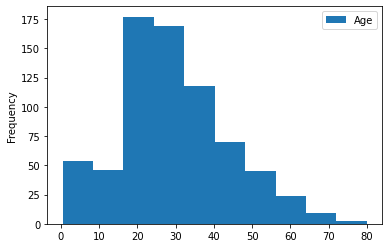

In [54]:
dataset['Age'].sort_index().plot(kind='hist', legend = True)

The minimal and maximum ages of the passengers are 0.42 and 80 respectively

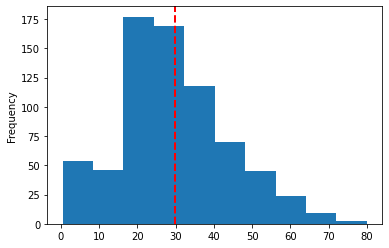

In [43]:
ax = dataset['Age'].sort_index().plot(kind='hist')
ax.axvline(dataset["Age"].mean(), color="red", linestyle="dashed",linewidth=2)

In [44]:
print("Mean value is", dataset["Age"].mean())

Mean value is 29.69911764705882


По гистограмме понимаем, что минимальный возраст пассажира - меньше 1 года (0.42), а максимальный - 80
<br>
Среднее значение возраста - около 30 лет
<br>
Распределение возраста было бы похоже на нормальное, но детей до 7-8 лет больше, чем пассажиров от около 8 до примерно 18
<br>
Также видно, что больше всего пассажиров в возрасте приблизительно 20-30 лет (24 - самый популярный возраст)
<br>
Детей на корабле в возрасте до 10 лет больше, чем пожилых пассажиров в возрасте от 65

---
**Task 4** (0.5 points) <br/>
Visualize age distribution for survived and not survived passengers separately and calculate the mean age for each class. Are they different? Make conclusions about what you see on the plot

<AxesSubplot:ylabel='Frequency'>

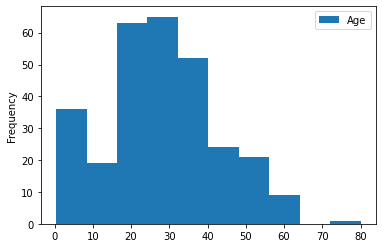

In [78]:
survived = dataset[dataset["Survived"] == 1]

survived['Age'].sort_index().plot(kind='hist', legend = True)

<AxesSubplot:ylabel='Frequency'>

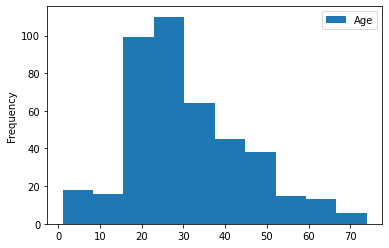

In [84]:
not_survived = dataset[dataset["Survived"] == 0]
not_survived['Age'].sort_index().plot(kind='hist', legend = True)

По гистограмме видно, что возраст выживших и невыживших пассажиров распределён по-разному
<br>
Например, среди выживших пассажиров немаленькую долю составляют дети до 10 лет
<br>
Невыживших детей намного меньше, чем детей, которые всё-таки спаслись
<br>
Также среди выживших есть люди в возрасте от около 72 до 80, и в это же время нет невыживших в возрасте более ~ 75
<br>
В возрасте от 30 до 40 скорее больше выживших, чем невыживших
<br>
Также видно, что 1 гистограмма прерывается в возрасте от ~64 до ~72, а 2 гистограмма непрерывна => пассажирам в данном диапазоне возраста не удалось спастись
<br>
Среди выживших больше всего пассажиров в возрасте ~ 20-30 лет
<br>
В то же время и среди невыживших пассажиров люди от 20 до 30 лет - самая многочисленная группа
<br>
(дело в том, что это в целом самая многочисленная группа)

---
**Task 5** (0.5 points) <br/>
Is there correlation between the port of embarkation and the ticket price? Calculate mean price for each port and visualize price distribution for each port. Make conclusions about what you see on the plot

Hint: you could make one or several plot types i.e.  box, violine, pair, histogram (see additional notebooks for Seminar 1 "Visualization with Seaborn"). The main point here is to **choose** plots wisely and **make meaningful conclusions**



In [93]:
dataset.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [96]:
print('Mean ticket price for the port S is', np.round(dataset[dataset["Embarked"] == 'S']["Fare"].mean(), 2))
print('Mean ticket price for the port C is', np.round(dataset[dataset["Embarked"] == 'C']["Fare"].mean(), 2))
print('Mean ticket price for the port Q is', np.round(dataset[dataset["Embarked"] == 'Q']["Fare"].mean(), 2))

Mean ticket price for the port S is 27.08
Mean ticket price for the port C is 59.95
Mean ticket price for the port Q is 13.28


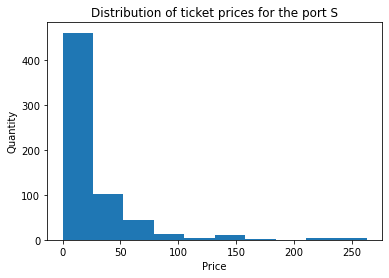

In [128]:
port_S = dataset[dataset["Embarked"] == 'S']["Fare"]
plt.hist(port_S, bins=10)
plt.title('Distribution of ticket prices for the port S')
plt.xlabel("Price")
plt.ylabel("Quantity")
plt.show()

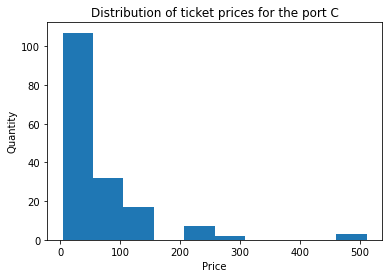

In [126]:
port_C = dataset[dataset["Embarked"] == 'C']["Fare"]
plt.hist(port_C, bins=10)
plt.title('Distribution of ticket prices for the port C')
plt.xlabel("Price")
plt.ylabel("Quantity")
plt.show()

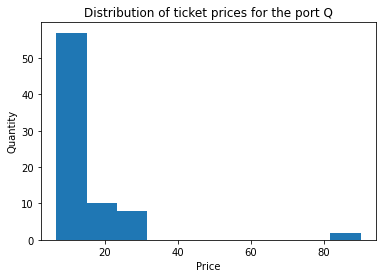

In [124]:
port_Q = dataset[dataset["Embarked"] == 'Q']["Fare"]
plt.hist(port_Q, bins=10)
plt.title('Distribution of ticket prices for the port Q')
plt.xlabel("Price")
plt.ylabel("Quantity")
plt.show()

Корреляция между ценой и портом есть, что можно видеть из построенных гистограмм
<br>
Прежде всего, отличаются средние значения, максимальные и минимальные цены билетов в зависимости от порта
<br>
Для порта S среднее около 27, наибольшее значение - в районе 260, наименьшее - 0
<br>
Для порта C соответствующие значения: ~60, ~510, ~3-4
<br>
И для порта Q: ~13, ~85-90, ~5-7
<br>
Для порта S распределение цены более "гладкое", чем для других портов, на гистограммах которых видны разрывы, из чего можно сделать вывод, что цена для порта S была более "стабильной" (примерно одинаковой для большего количества людей)
<br>
Для порта C видно два разрыва, то есть были пассажиры, купившие билет по очень разным ценам
<br>
Для порта Q виден один разрыв, но разница в максимальной и минимальной цене за билет не такая большая, как для порта C

---
**Task 6** (0.5 points) <br/>
The same question as in task 5 about correlation between *pclass* and *ticket priсe*.

In [131]:
dataset.Pclass.unique().tolist()

[3, 1, 2]

In [132]:
class_1 = dataset[dataset["Pclass"] == 1]["Fare"]
class_2 = dataset[dataset["Pclass"] == 2]["Fare"]
class_3 = dataset[dataset["Pclass"] == 3]["Fare"]

In [164]:
print('Mean ticket price for the 1st class', np.round(class_1.mean(), 2))
print('Mean ticket price for the 2nd class', np.round(class_2.mean(), 2))
print('Mean ticket price for the 3rd class', np.round(class_3.mean(), 2))

Mean ticket price for the 1st class 84.15
Mean ticket price for the 2nd class 20.66
Mean ticket price for the 3rd class 13.68


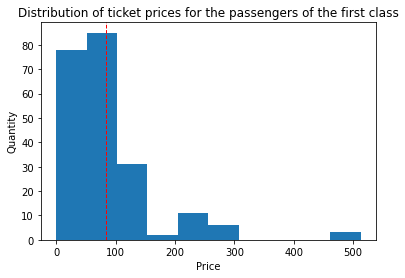

In [138]:
plt.hist(class_1, bins=10)
plt.title('Distribution of ticket prices for the passengers of the first class')
plt.xlabel("Price")
plt.ylabel("Quantity")
plt.axvline(class_1.mean(), color='red', linestyle='dashed', linewidth=1)
plt.show()

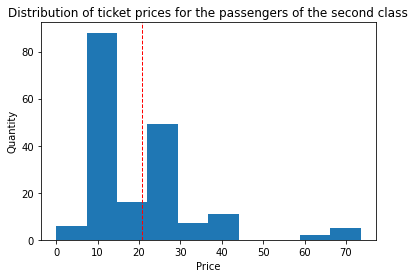

In [139]:
plt.hist(class_2, bins=10)
plt.title('Distribution of ticket prices for the passengers of the second class')
plt.xlabel("Price")
plt.ylabel("Quantity")
plt.axvline(class_2.mean(), color='red', linestyle='dashed', linewidth=1)
plt.show()

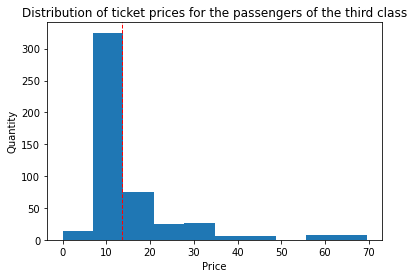

In [140]:
plt.hist(class_3, bins=10)
plt.title('Distribution of ticket prices for the passengers of the third class')
plt.xlabel("Price")
plt.ylabel("Quantity")
plt.axvline(class_3.mean(), color='red', linestyle='dashed', linewidth=1)
plt.show()

По построенным гистограммам чётко видно, что цена и класс взаимосвязанны
<br>
Прежде всего, чем выше класс (1- самый высокий, 3 - самый низкий), тем больше средняя цена билета (на гистограммах средней цене соответствует красная пунктирная линия)
<br>
Также видно, что максимальная цена билета за 1 класс намного выше максимальной цены за 2 и 3 класс
<br>
При этом минимальная стоимость билетов везде одинаковая и равна 0
<br>
Также можно отметить, что разница в стоимости билетов наибольшая для 1 класса (между максимальной и минимальной, а также между максимальной и средней ценой за билет)

In [136]:
dataset.Pclass.corr(dataset.Fare)

-0.5494996199439078

Можно убедиться, что коррелляция между двумя факторами есть, и она отрицательная
<br>
Чем меньше по значению номер класса, тем выше цена